## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
#Reading the data using ';' as delimiter
df = pd.read_csv('students-data.csv',delimiter=';')
df.shape

(395, 33)

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Finding out the data types and non-null status
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [5]:
df['number'] = df.index

In [6]:
df.set_index('number', inplace=True)

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# Finding the count wise distribution for each feature. 
# This helped in knowing the features which has 0 as value, and number of records having 0 for that feature.
for col in df.columns:
    print("Label Name =======> ", col)
    print("Value Counts : ")
    print(df[col].value_counts())
    print("----------------------------------------")

Label Name =======>  school
Value Counts : 
GP    349
MS     46
Name: school, dtype: int64
----------------------------------------
Label Name =======>  sex
Value Counts : 
F    208
M    187
Name: sex, dtype: int64
----------------------------------------
Label Name =======>  age
Value Counts : 
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
----------------------------------------
Label Name =======>  address
Value Counts : 
U    307
R     88
Name: address, dtype: int64
----------------------------------------
Label Name =======>  famsize
Value Counts : 
GT3    281
LE3    114
Name: famsize, dtype: int64
----------------------------------------
Label Name =======>  Pstatus
Value Counts : 
T    354
A     41
Name: Pstatus, dtype: int64
----------------------------------------
Label Name =======>  Medu
Value Counts : 
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
----------------------------------------
Label

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [9]:
# Finding out all non-numerical attributes
object_col = [col for col in df.columns if df[col].dtype == np.object]
print('Non-Numerical attributes are : ')
object_col

Non-Numerical attributes are : 


['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [10]:
#Replacing 0 with 4, as described in the Metadata, before calculating the variance
#Extract from Metadata - "failures - number of past class failures (numeric: n if 1<=n<3, else 4)"
df.failures.replace(to_replace=0,value=4, inplace=True)

In [11]:
#Describing all Non-Numerical labels
df.describe(include=np.object)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [12]:
#Describing all Numerical labels
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,3.493671,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,1.048003,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,4.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,4.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
# Finding the variance for all Numerical attributes
var = df.var()
print(var)

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       1.098310
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64


In [14]:
#Extracting all Labels with variance < 1
variance_drop_columns = var[var.values < 1].index
print(" ************** Labels with Variance < 1 ************** ")
variance_drop_columns

 ************** Labels with Variance < 1 ************** 


Index(['traveltime', 'studytime', 'famrel', 'freetime', 'Dalc'], dtype='object')

In [15]:
#Dropping the labels with variance < 1, from the original frame, to create a new frame
df_updated_1 = df.drop(labels=variance_drop_columns,axis=1)
df_updated_1.describe()

,age,Medu,Fedu,failures,goout,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,3.493671,3.108861,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,1.048003,1.113278,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,4.000000,2.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,4.000000,3.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,4.000000,4.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [16]:
df_updated_1.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395,395,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,375,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,NaN,NaN,NaN,3.108861,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,NaN,NaN,NaN,1.113278,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,2.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,3.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,4.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in object_col:
    df_updated_1[col] = encoder.fit_transform(df_updated_1[col])

In [18]:
df_updated_1.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,0.949367,0.832911,0.334177,3.108861,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.219525,0.373528,0.472300,1.113278,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,2.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,3.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,4.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [19]:
# Method to take score as input and return 'fail' if score < 10, and 'pass' if otherwise
def pass_fail_condition(score):
    
    if score < 10:
        return 0
    else:
        return 1

In [20]:
#Before conversion - G1, G2, G3 having min max spread between 0 and 20
df_updated_1[['G1','G2','G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


In [21]:
for col in df_updated_1.columns[-3:] :
    print("Updating Grade value to Categorical value for the label : ",col)
    df_updated_1[col] = df_updated_1[col].apply(pass_fail_condition)

Updating Grade value to Categorical value for the label :  G1
Updating Grade value to Categorical value for the label :  G2
Updating Grade value to Categorical value for the label :  G3


In [22]:
#After conversion - G1, G2, G3 having min max with values only between 0 and 1
df_updated_1[['G1','G2','G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,0.640506,0.630380,0.670886
std,0.480461,0.483314,0.470487
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [23]:
X = df_updated_1.drop(labels='G3', axis=1)
y = df_updated_1['G3']

In [24]:
print(df_updated_1.shape)
print(X.shape)
print(y.shape)

(395, 28)
(395, 27)
(395,)


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

 ******* Count of G2 distribution ******* 
1    249
0    146
Name: G2, dtype: int64


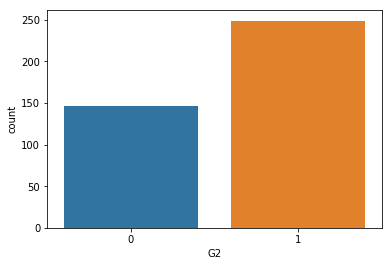

In [25]:
print(" ******* Count of G2 distribution ******* ")
print(df_updated_1.G2.value_counts())
ax = sns.countplot(x='G2',data=df_updated_1)

 ******* Count of G3 distribution ******* 
1    265
0    130
Name: G3, dtype: int64


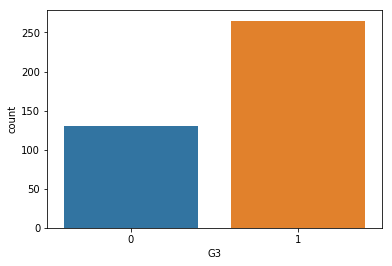

In [26]:
print(" ******* Count of G3 distribution ******* ")
print(df_updated_1.G3.value_counts())
sns.countplot(x='G3',data=df_updated_1)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


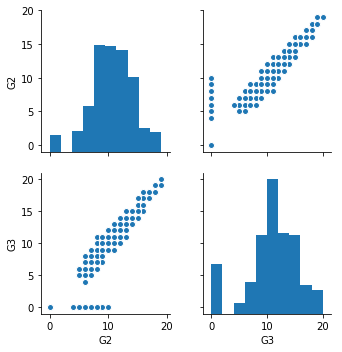

In [27]:
sns.pairplot(data=df[['G2','G3']], kind='scatter')

*** Observations ***
* G2 and G3 have a very strong positive co-relation. 
* Hence G2 can be a strong label in predicting G3

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

 ******* Number of students from each school ****** 
0    349
1     46
Name: school, dtype: int64


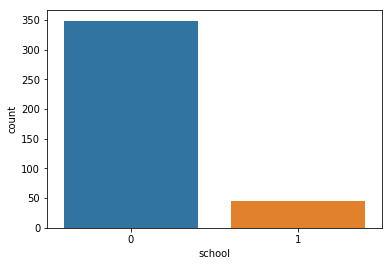

In [28]:
print(" ******* Number of students from each school ****** ")
print(df_updated_1.school.value_counts())
sns.countplot(x='school', data=df_updated_1)

 ******* Students of different age group from each School ****** 
school  age
GP      16     104
        17      86
        15      82
        18      57
        19      18
        20       1
        22       1
MS      18      25
        17      12
        19       6
        20       2
        21       1
Name: age, dtype: int64


Text(0.5,1,'Students of different age group from each School')

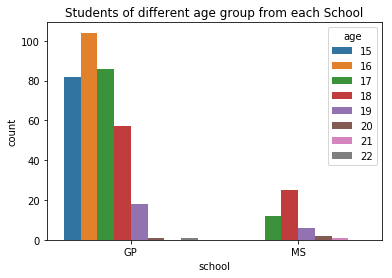

In [29]:
print(" ******* Students of different age group from each School ****** ")
print(df.groupby('school').age.value_counts())
ax = sns.countplot(x='school', data=df, hue='age')
ax.set_title("Students of different age group from each School")

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [30]:
df_updated_1.shape

(395, 28)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=300, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 27)
(300,)
(95, 27)
(95,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
print("Confusion Matrix for the model : ")
metrics.confusion_matrix(y_test, y_pred)

Confusion Matrix for the model : 


array([[30,  0],
       [ 9, 56]])

In [38]:
model.score(X_test, y_test)

0.9052631578947369

In [41]:
print("Score for Training data : ",model.score(X_train, y_train))
print("Accuracy Score for the Model(Test Data) : ",metrics.accuracy_score(y_test, y_pred))

Score for Training data :  0.9233333333333333
Accuracy Score for the Model(Test Data) :  0.9052631578947369


In [42]:
from sklearn.metrics import f1_score
print('F1 Score : ', f1_score(y_test, y_pred))

F1 Score :  0.9256198347107438


# Naive bayes with Iris data

### Import Iris.csv

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df_iris = pd.read_csv('Iris.csv')

In [45]:
df_iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df_iris.isna().any()

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

In [47]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [48]:
X_nb = df_iris.drop(labels='Class', axis=1)
y_nb = df_iris.Class

### Find the distribution of target variable (Class)

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Class, dtype: int64


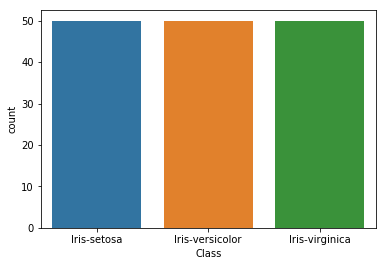

In [49]:
print(df_iris.Class.value_counts())
sns.countplot(x='Class', data=df_iris)

In [50]:
df_iris.groupby('Class').count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

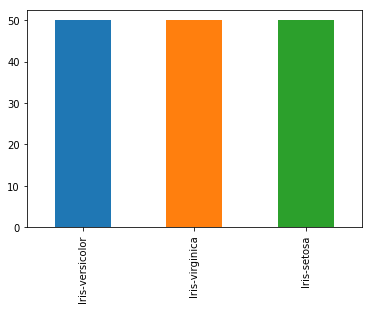

In [51]:
pd.value_counts(df_iris["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

**** Insights ****
* Petal Length and Petal Width gives a very good separation

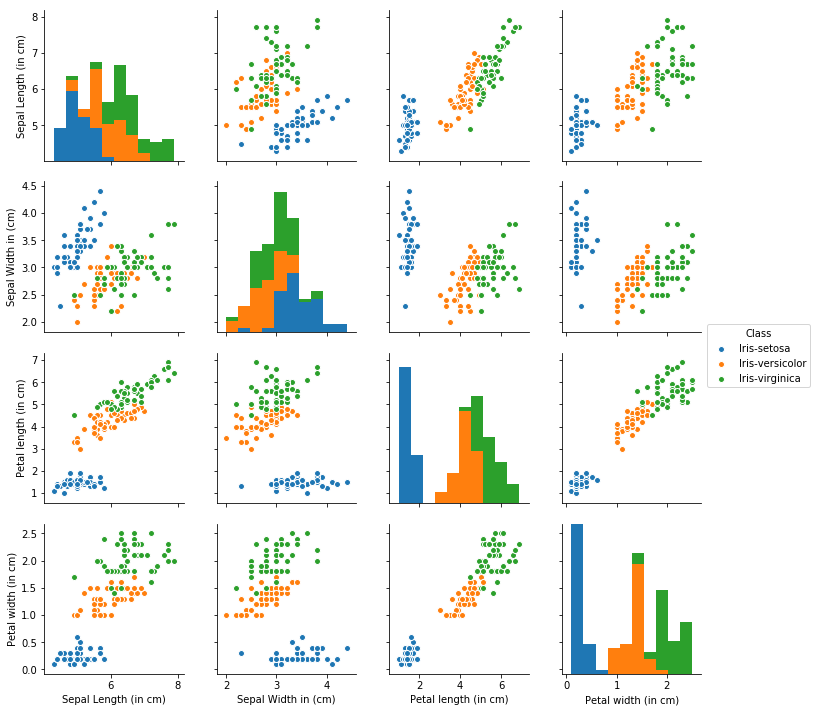

In [52]:
#Pairplot is one of the scatter matrix to visualaize the distribution
sns.pairplot(data=df_iris, hue='Class')

### Summary Statistics and explain insights for at least 2 variables

* Petal Length is always less(~2cm) for Iris-Setosa. It is a strong feature to classify Iris-Setosa
* Iris-versicolor and Iris-virginica have some moderate overlap

### Correlation among all variables and give your insights

* Sepal Width and Petal Length, together gives a very strong separation between classes
* Petal Length and Petal Width have a strong positive correlation.
* Sepal Length to Sepal Length has lots of overlapping, and may not be useful much to classifiy

### Split data in Training and Validation in 80:20

In [53]:
X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state = 1)

### Do Feature Scaling

*** Observations ***
* Personally I feel Feature Scaling is **not required** for this sample, as all the indepenent variables are in the **same unit**.
* If they are in the same unit, values have equal weightage when compared to each other.
* To add further, even without feature scaling, the scores for Iris sample is really high

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [55]:
# Feature scaling is generally not required for the target variable
X_nb_train_scaled = scaler.fit_transform(X_nb_train)
X_nb_test_scaled = scaler.fit_transform(X_nb_test)
X_nb_train_min_max = scaler.fit_transform(X_nb_train)
X_nb_test_min_max = scaler.fit_transform(X_nb_test)

### Train and Fit NaiveBayes Model

In [56]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model_scaled = GaussianNB()
nb_model_min_max = GaussianNB()

In [57]:
nb_model.fit(X_nb_train, y_nb_train)
nb_model_scaled.fit(X_nb_train_scaled, y_nb_train)
nb_model_min_max.fit(X_nb_train_min_max, y_nb_train)

GaussianNB(priors=None)

In [58]:
y_nb_pred = nb_model.predict(X_nb_test)
y_nb_pred_scaled = nb_model_scaled.predict(X_nb_test_scaled)
y_nb_pred_min_max = nb_model_min_max.predict(X_nb_test_min_max)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [59]:
print(" ******* Confusion Martix (Without Feature Scaling) ******** ")
metrics.confusion_matrix(y_nb_test,y_nb_pred)

 ******* Confusion Martix (Without Feature Scaling) ******** 


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [60]:
print(" ******* Confusion Martix (Standard Scaling) ******** ")
metrics.confusion_matrix(y_nb_test,y_nb_pred_scaled)

 ******* Confusion Martix (Standard Scaling) ******** 


array([[11,  0,  0],
       [ 0, 10,  3],
       [ 0,  0,  6]])

In [63]:
print(" ******* Confusion Martix (MinMax Scaling) ******** ")
metrics.confusion_matrix(y_nb_test,y_nb_pred_min_max)

 ******* Confusion Martix (MinMax Scaling) ******** 


array([[11,  0,  0],
       [ 0, 10,  3],
       [ 0,  0,  6]])

*** Observation from Confustion Matrix ***
* Model without feature scaling predicted **29/30** values correctly"
* Model with Standard Scaling predicted **27/30** values correctly"
* Model with MinMax Scaling predicted **27/30** values correctly"

In [64]:
print(" ******* Accuracy Scores ******* ")
print("Without Scaling = ", nb_model.score(X_nb_test, y_nb_test))
print("Standard Scaled = ", nb_model_scaled.score(X_nb_test_scaled, y_nb_test))
print("MinMax Scaled = ", nb_model_min_max.score(X_nb_test_min_max, y_nb_test))
score = nb_model.score(X_nb_test, y_nb_test)
score_scaled = nb_model_scaled.score(X_nb_test_scaled, y_nb_test)
score_min_max = nb_model_min_max.score(X_nb_test_min_max, y_nb_test)

 ******* Accuracy Scores ******* 
Without Scaling =  0.9666666666666667
Standard Scaled =  0.9
MinMax Scaled =  0.9


*** Conclusion ***
* Accuracy was better without Feature scaling, at over **96%**
* There is **no improvement** in the score because of Feature Scaling in this case.
* **Feature scaling is not required always**. In this case, all the dependent variables were already in the same units.